In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

GITHUB_RAW_CSV = "https://raw.githubusercontent.com/VaishnaviBiradar895/Student-Grade-Prediction-ML/main/student_performance_regression.csv"
TARGET_COL = "final_grade"



In [2]:
df = pd.read_csv(GITHUB_RAW_CSV)
df.head(10)



,student_id,gender,study_hours,attendance,previous_score,assignments_completed,participation,internet_access,parent_education,final_grade
0,1,Male,1,50,93,3,3,No,High School,37
1,2,Female,4,95,85,7,1,No,Bachelor,57
2,3,Male,7,98,56,2,8,No,Master,51
3,4,Male,9,56,89,5,5,No,High School,63
4,5,Male,8,77,56,3,4,No,Master,49
5,6,Female,8,63,80,7,8,No,High School,60
6,7,Male,0,44,64,8,7,Yes,Bachelor,26
7,8,Male,8,91,72,7,2,Yes,Master,62
8,9,Male,6,73,72,4,1,Yes,High School,52
9,10,Female,8,45,79,5,4,Yes,Bachelor,51


In [3]:
df.tail()


,student_id,gender,study_hours,attendance,previous_score,assignments_completed,participation,internet_access,parent_education,final_grade
115,116,Female,9,42,85,3,7,Yes,Master,59
116,117,Male,5,56,59,5,3,Yes,Master,42
117,118,Female,6,72,92,8,7,No,Master,54
118,119,Female,3,87,56,3,3,Yes,High School,35
119,120,Male,6,51,92,3,2,No,Master,52


In [4]:
df.shape


(120, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             120 non-null    int64 
 1   gender                 120 non-null    object
 2   study_hours            120 non-null    int64 
 3   attendance             120 non-null    int64 
 4   previous_score         120 non-null    int64 
 5   assignments_completed  120 non-null    int64 
 6   participation          120 non-null    int64 
 7   internet_access        120 non-null    object
 8   parent_education       120 non-null    object
 9   final_grade            120 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 9.5+ KB


In [6]:
df.describe()


,student_id,study_hours,attendance,previous_score,assignments_completed,participation,final_grade
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,4.491667,68.941667,67.241667,5.675000,4.791667,44.658333
std,34.785054,3.018141,17.690759,16.089036,2.181521,2.631087,11.211860
min,1.000000,0.000000,40.000000,35.000000,2.000000,1.000000,18.000000
25%,30.750000,2.000000,55.000000,56.750000,4.000000,3.000000,36.000000
50%,60.500000,5.000000,69.500000,67.000000,6.000000,4.500000,46.000000
75%,90.250000,7.000000,85.500000,80.250000,7.000000,7.000000,52.250000
max,120.000000,9.000000,99.000000,94.000000,9.000000,9.000000,70.000000


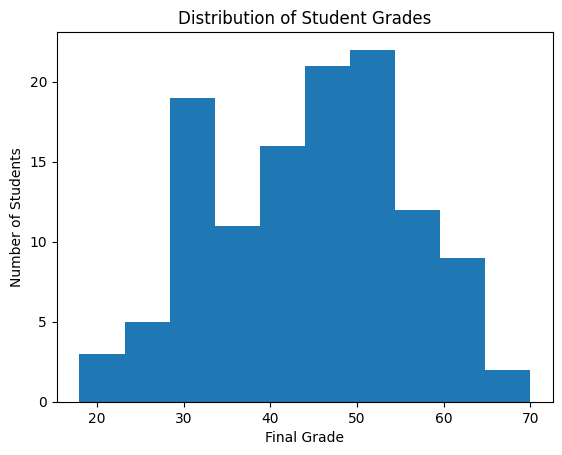

In [7]:
plt.figure()
plt.hist(df[TARGET_COL], bins=10)
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grades")
plt.show()


In [8]:
df.columns


Index(['student_id', 'gender', 'study_hours', 'attendance', 'previous_score',
       'assignments_completed', 'participation', 'internet_access',
       'parent_education', 'final_grade'],
      dtype='object')

In [9]:
X = df.drop(columns=[TARGET_COL], errors="ignore")
y = df[TARGET_COL]


In [10]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['student_id', 'study_hours', 'attendance', 'previous_score', 'assignments_completed', 'participation']
Categorical columns: ['gender', 'internet_access', 'parent_education']


In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ]
)


In [12]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['student_id', 'study_hours',
                                                   'attendance',
                                                   'previous_score',
                                                   'assignments_completed',
                                                   'participation']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'internet_access',
                                                   'parent_education'])])),
                ('regressor', LinearRegression())])

In [15]:
def convert_to_letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 40:
        return 'D'
    else:
        return 'F'



In [16]:
# Take structure from existing data
new_student = X.iloc[[0]].copy()

# Example values (change according to your dataset)
if 'study_hours' in new_student.columns:
    new_student['study_hours'] = 9

if 'attendance' in new_student.columns:
    new_student['attendance'] = 99

if 'previous_score' in new_student.columns:
    new_student['previous_score'] = 95

if 'assignments_completed' in new_student.columns:
    new_student['assignments_completed'] = 8

if 'participation' in new_student.columns:
    new_student['participation'] = 7

if 'gender' in new_student.columns:
    new_student['gender'] = 'Male'

if 'internet_access' in new_student.columns:
    new_student['internet_access'] = 'Yes'

if 'parent_education' in new_student.columns:
    new_student['parent_education'] = 'Bachelor'

In [17]:
new_student_pred = model.predict(new_student)[0]
new_student_pred = np.clip(new_student_pred, 0, 100)


In [18]:
new_student_letter = convert_to_letter_grade(new_student_pred)

print("Predicted Numeric Grade:", round(new_student_pred, 2))
print("Predicted Letter Grade:", new_student_letter)

Predicted Numeric Grade: 71.33
Predicted Letter Grade: B


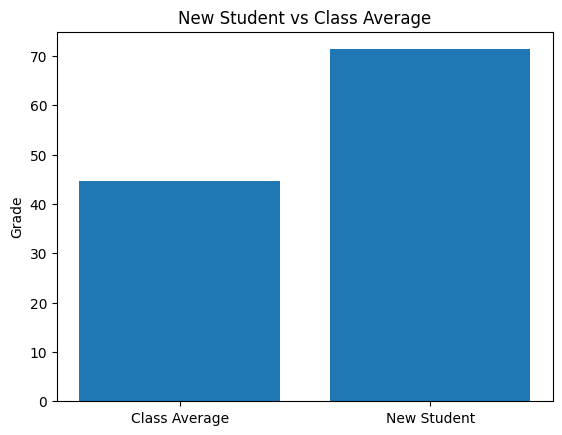

In [19]:
class_avg = df[TARGET_COL].mean()
new_pred = model.predict(new_student)[0]

plt.figure()
plt.bar(
    ["Class Average", "New Student"],
    [class_avg, new_pred]
)
plt.ylabel("Grade")
plt.title("New Student vs Class Average")
plt.show()


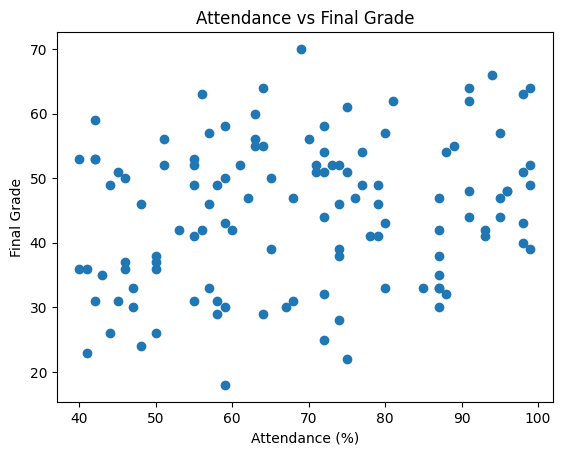

In [20]:
plt.figure()
plt.scatter(df['attendance'], df[TARGET_COL])
plt.xlabel("Attendance (%)")
plt.ylabel("Final Grade")
plt.title("Attendance vs Final Grade")
plt.show()


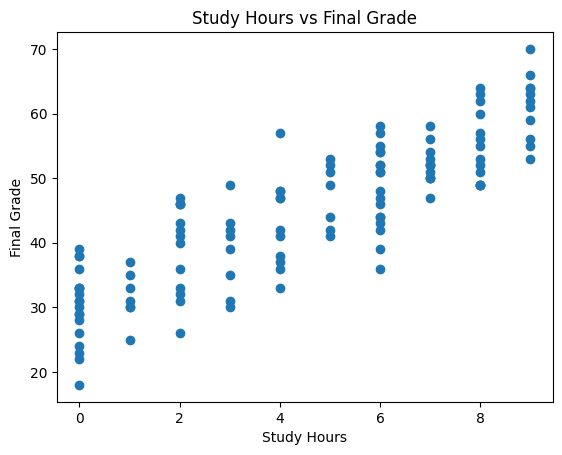

In [21]:
plt.figure()
plt.scatter(df['study_hours'], df[TARGET_COL])
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.title("Study Hours vs Final Grade")
plt.show()

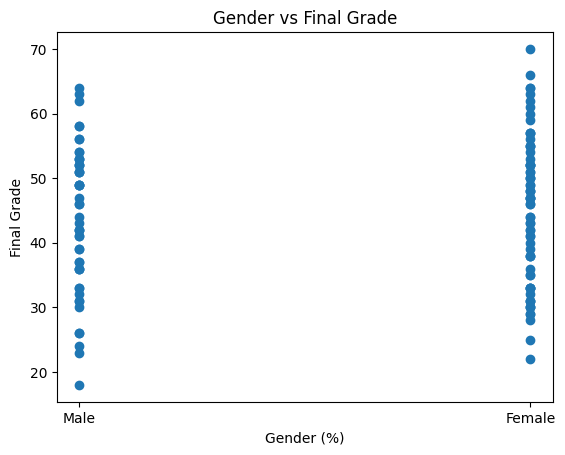

In [22]:
plt.figure()
plt.scatter(df['gender'], df[TARGET_COL])
plt.xlabel("Gender (%)")
plt.ylabel("Final Grade")
plt.title("Gender vs Final Grade")
plt.show()

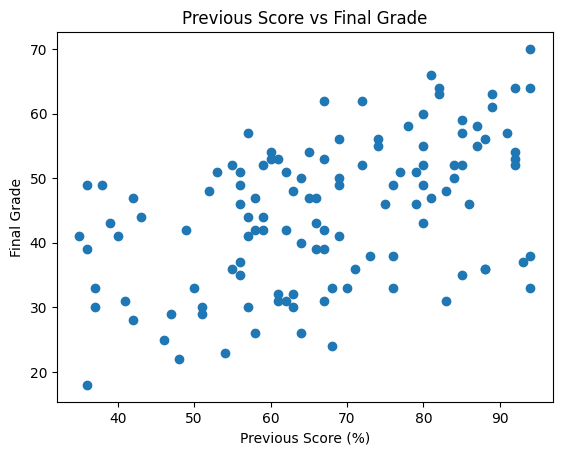

In [23]:
plt.figure()
plt.scatter(df['previous_score'], df[TARGET_COL])
plt.xlabel("Previous Score (%)")
plt.ylabel("Final Grade")
plt.title("Previous Score vs Final Grade")
plt.show()

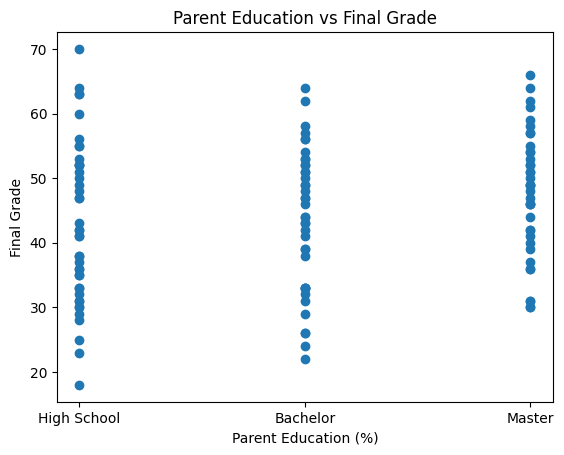

In [24]:
plt.figure()
plt.scatter(df['parent_education'], df[TARGET_COL])
plt.xlabel("Parent Education (%)")
plt.ylabel("Final Grade")
plt.title("Parent Education vs Final Grade")
plt.show()

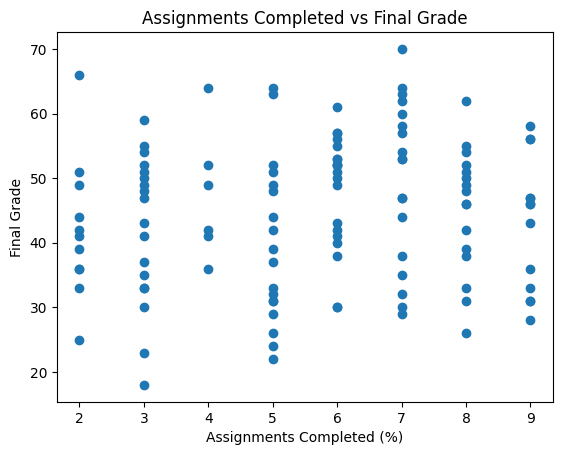

In [25]:
plt.figure()
plt.scatter(df['assignments_completed'], df[TARGET_COL])
plt.xlabel("Assignments Completed (%)")
plt.ylabel("Final Grade")
plt.title("Assignments Completed vs Final Grade")
plt.show()

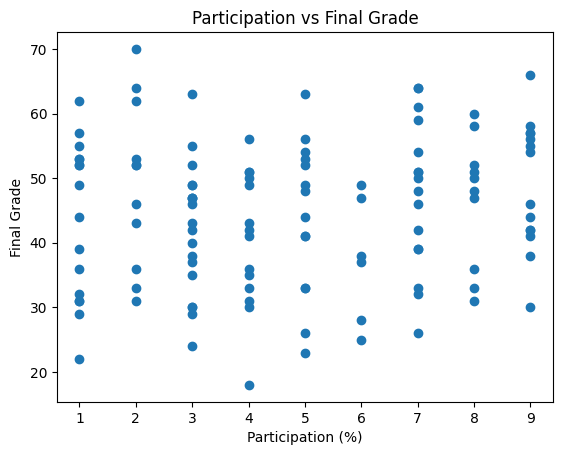

In [26]:
plt.figure()
plt.scatter(df['participation'], df[TARGET_COL])
plt.xlabel("Participation (%)")
plt.ylabel("Final Grade")
plt.title("Participation vs Final Grade")
plt.show()

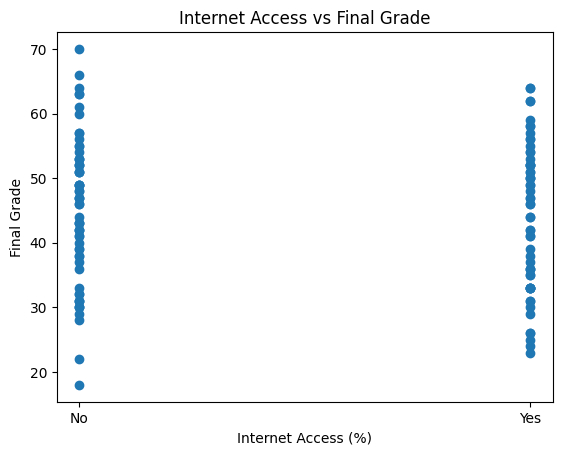

In [27]:
plt.figure()
plt.scatter(df['internet_access'], df[TARGET_COL])
plt.xlabel("Internet Access (%)")
plt.ylabel("Final Grade")
plt.title("Internet Access vs Final Grade")
plt.show()